C:\Users\bryxp\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bryxp\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


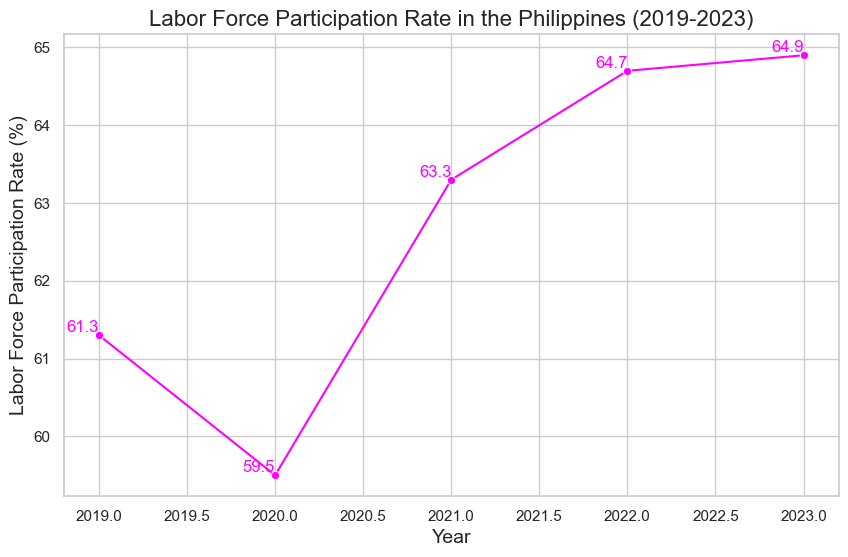

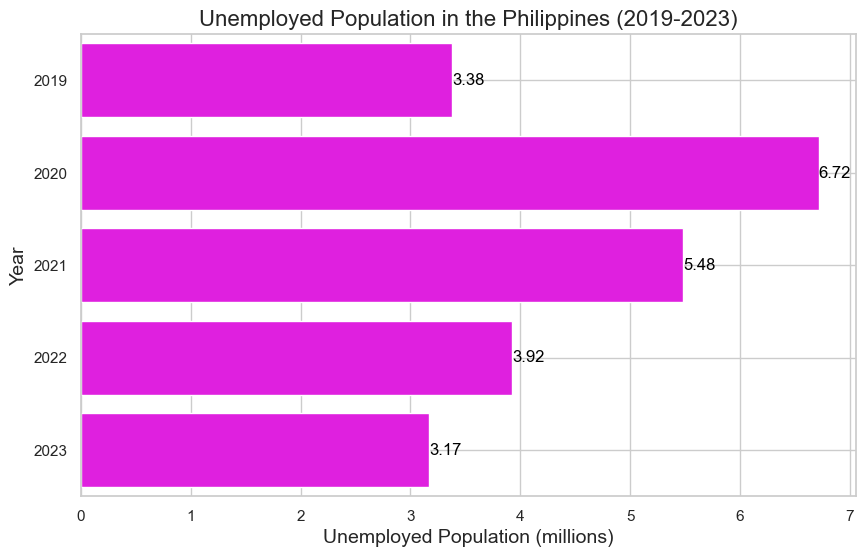

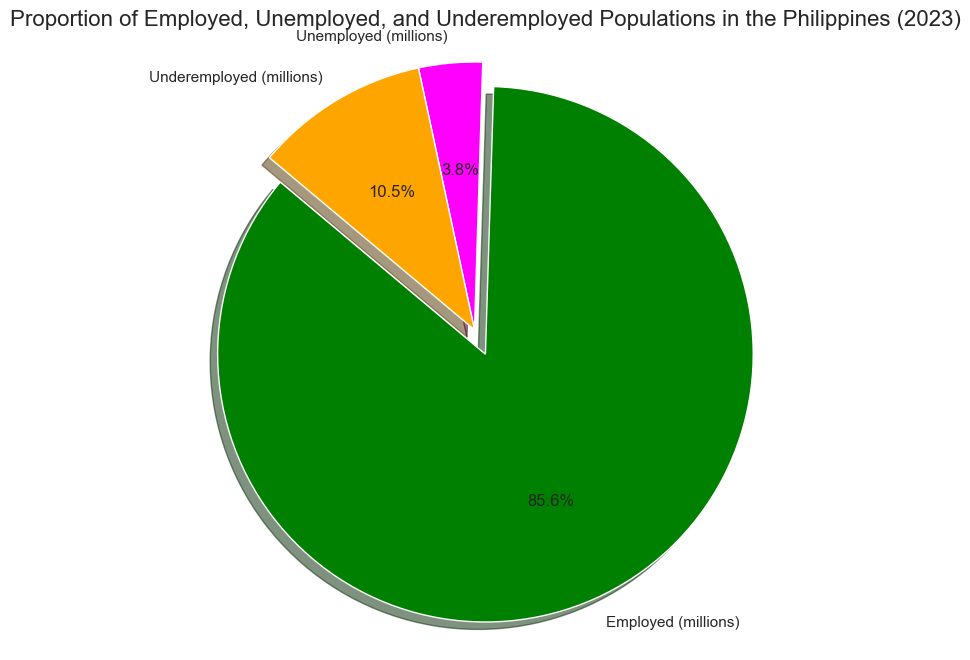

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file
file_path = "Philippines_Employment_Data_2019_2023.csv"
df = pd.read_csv(file_path)


# Set the style for seaborn
sns.set(style="whitegrid")


# 1. Labor Force Participation Rate Over Time (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Labor Force Participation Rate (%)', data=df, marker='o', color='magenta')
plt.title('Labor Force Participation Rate in the Philippines (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Labor Force Participation Rate (%)', fontsize=14)
plt.grid(True)


# Adding data labels for Labor Force Participation Rate
for x, y in zip(df['Year'], df['Labor Force Participation Rate (%)']):
    plt.text(x, y, f'{y:.1f}', color='magenta', ha='right', va='bottom')


plt.show()


# 2. Unemployed Population Over Time (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(y='Year', x='Unemployed (millions)', data=df, color='magenta', orient='h')
plt.title('Unemployed Population in the Philippines (2019-2023)', fontsize=16)
plt.ylabel('Year', fontsize=14)
plt.xlabel('Unemployed Population (millions)', fontsize=14)
plt.grid(True)


# Adding data labels for Unemployed Population
for index, value in enumerate(df['Unemployed (millions)']):
    plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')


plt.show()


# 3. Proportion of Employed, Unemployed, and Underemployed Populations in 2023 (Pie Chart)
df_2023 = df[df['Year'] == 2023]
sizes_2023 = [df_2023['Employed (millions)'].values[0], df_2023['Unemployed (millions)'].values[0], df_2023['Underemployed (millions)'].values[0]]
labels = ['Employed (millions)', 'Unemployed (millions)', 'Underemployed (millions)']
colors = ['green', 'magenta', 'orange']
explode = (0.1, 0, 0)  # explode the first slice


plt.figure(figsize=(8, 8))
plt.pie(sizes_2023, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Employed, Unemployed, and Underemployed Populations in the Philippines (2023)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

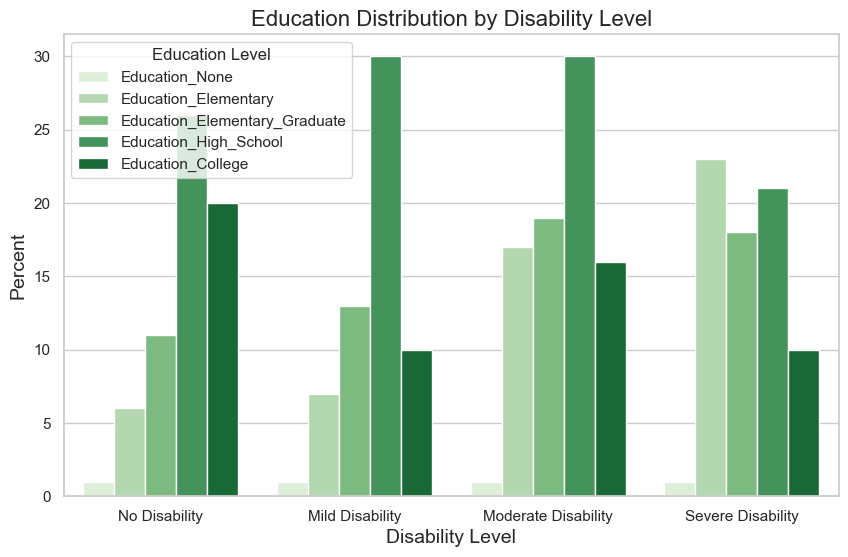

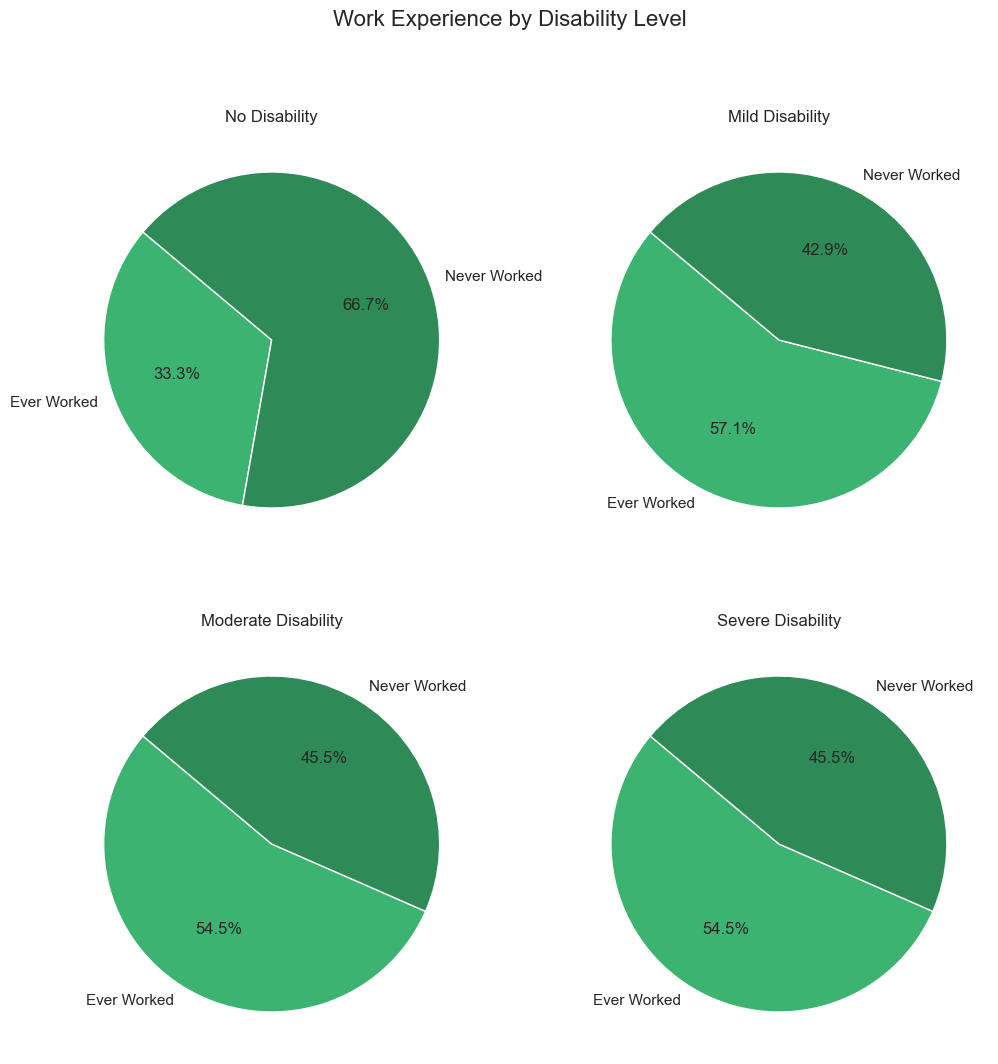

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = {
    'Category': ['No Disability', 'Mild Disability', 'Moderate Disability', 'Severe Disability'],
    'Percent_Distribution': [19, 22, 47, 12],
    'Gender_Distribution_Male': [56, 57, 49, 40],
    'Gender_Distribution_Female': [44, 43, 51, 60],
    'Age_Group_15_39_No': [28, 24, 42, 6],
    'Age_Group_15_39_Mild': [28, 24, 42, 6],
    'Age_Group_15_39_Moderate': [28, 24, 42, 6],
    'Age_Group_15_39_Severe': [28, 24, 42, 6],
    'Age_Group_40_59_No': [24, 9, 53, 14],
    'Age_Group_60_Over_No': [11, 3, 54, 32],
    'Education_None': [1, 1, 1, 1],
    'Education_Elementary': [6, 7, 17, 23],
    'Education_Elementary_Graduate': [11, 13, 19, 18],
    'Education_High_School': [26, 30, 30, 21],
    'Education_College': [20, 10, 16, 10],
    'Work_Experience_Ever_Worked': [16, 24, 48, 12],
    'Work_Experience_Never_Worked': [32, 18, 40, 10],
    'Reason_Never_Work_Health': [1, 6, 1, 43],
    'Reason_Never_Work_Training': [68, 61, 19, 1],
    'Reason_Never_Work_Family': [15, 19, 21, 1],
    'Reason_Never_Work_Suitable_Work': [2, 1, 4, 1],
    'Reason_Not_Working_Health': [2, 3, 14, 54],
    'Reason_Not_Working_Training': [3, 1, 1, 1],
    'Reason_Not_Working_Family': [44, 21, 21, 1],
    'Education_Problem': [7, 8, 13, 25],
    'Work_Problem_Applying': [5, 13, 34, 1],
    'Work_Problem_Doing': [2, 3, 11, 1]
}

df = pd.DataFrame(data)

# Set the style for seaborn
sns.set(style="whitegrid")

# 4. Education Distribution by Disability Level
df_education = df[['Category', 'Education_None', 'Education_Elementary', 'Education_Elementary_Graduate', 'Education_High_School', 'Education_College']]
df_education = pd.melt(df_education, id_vars=['Category'], var_name='Education Level', value_name='Percent')
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Percent', hue='Education Level', data=df_education, palette='Greens')
plt.title('Education Distribution by Disability Level', fontsize=16)
plt.xlabel('Disability Level', fontsize=14)
plt.ylabel('Percent', fontsize=14)
plt.show()


# Extract work experience data
df_work_experience = df[['Category', 'Work_Experience_Ever_Worked', 'Work_Experience_Never_Worked']]

# Plotting pie charts for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

categories = df_work_experience['Category'].tolist()
work_experience_labels = ['Ever Worked', 'Never Worked']

for i, category in enumerate(categories):
    sizes = [df_work_experience.loc[i, 'Work_Experience_Ever_Worked'], df_work_experience.loc[i, 'Work_Experience_Never_Worked']]
    axs[i//2, i%2].pie(sizes, labels=work_experience_labels, autopct='%1.1f%%', startangle=140, colors=['mediumseagreen', 'seagreen'])
    axs[i//2, i%2].set_title(category)

plt.suptitle('Work Experience by Disability Level', fontsize=16)
plt.show()

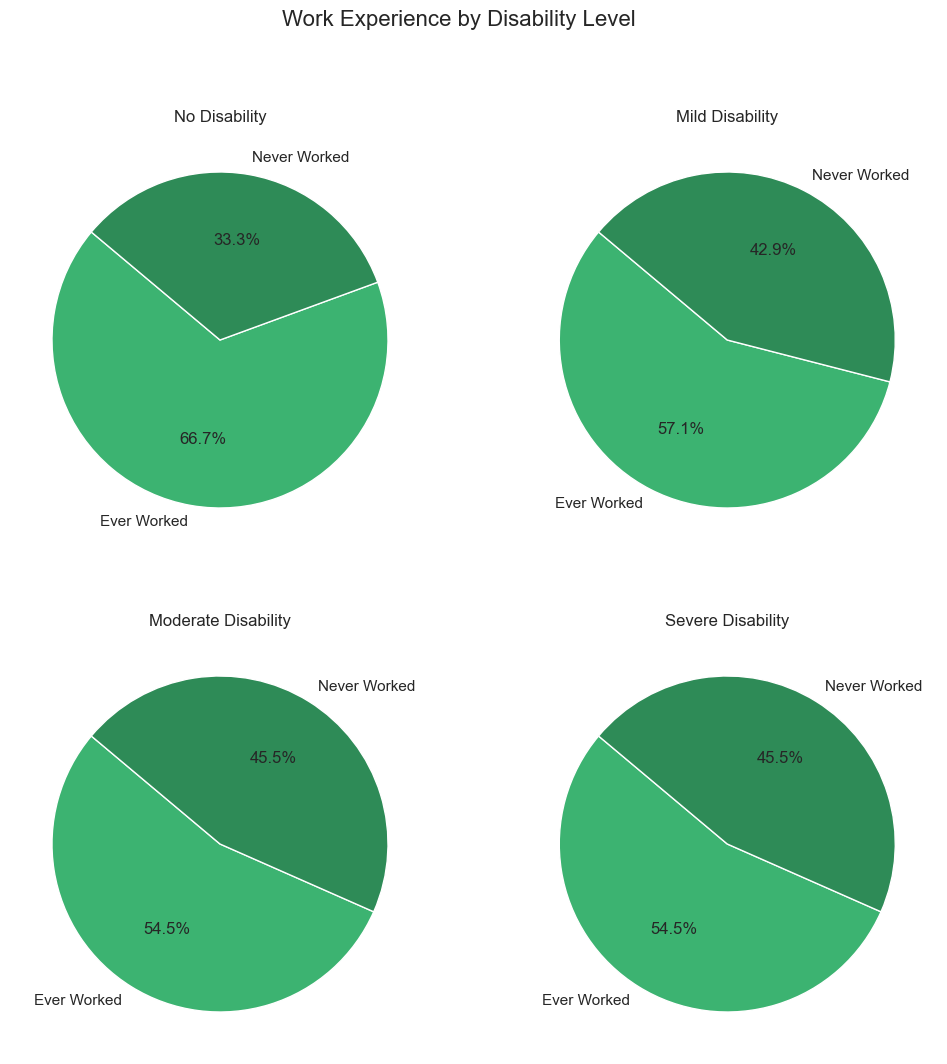

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Provided dataset
data = {
    'Category': ['No Disability', 'Mild Disability', 'Moderate Disability', 'Severe Disability'],
    'Percent_Distribution': [19, 22, 47, 12],
    'Gender_Distribution_Male': [56, 57, 49, 40],
    'Gender_Distribution_Female': [44, 43, 51, 60],
    'Age_Group_15_39_No': [28, 24, 42, 6],
    'Age_Group_15_39_Mild': [28, 24, 42, 6],
    'Age_Group_15_39_Moderate': [28, 24, 42, 6],
    'Age_Group_15_39_Severe': [28, 24, 42, 6],
    'Age_Group_40_59_No': [24, 9, 53, 14],
    'Age_Group_60_Over_No': [11, 3, 54, 32],
    'Education_None': [1, 1, 1, 1],
    'Education_Elementary': [6, 7, 17, 23],
    'Education_Elementary_Graduate': [11, 13, 19, 18],
    'Education_High_School': [26, 30, 30, 21],
    'Education_College': [20, 10, 16, 10],
    'Work_Experience_Ever_Worked': [66.7, 57.1, 54.5, 54.5],
    'Work_Experience_Never_Worked': [33.3, 42.9, 45.5, 45.5],
    'Reason_Never_Work_Health': [1, 6, 1, 43],
    'Reason_Never_Work_Training': [68, 61, 19, 1],
    'Reason_Never_Work_Family': [15, 19, 21, 1],
    'Reason_Never_Work_Suitable_Work': [2, 1, 4, 1],
    'Reason_Not_Working_Health': [2, 3, 14, 54],
    'Reason_Not_Working_Training': [3, 1, 1, 1],
    'Reason_Not_Working_Family': [44, 21, 21, 1],
    'Education_Problem': [7, 8, 13, 25],
    'Work_Problem_Applying': [5, 13, 34, 1],
    'Work_Problem_Doing': [2, 3, 11, 1]
}

df = pd.DataFrame(data)

# Set the style for seaborn
sns.set(style="whitegrid")

# Extract work experience data
df_work_experience = df[['Category', 'Work_Experience_Ever_Worked', 'Work_Experience_Never_Worked']]

# Plotting pie charts for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

categories = df_work_experience['Category'].tolist()
work_experience_labels = ['Ever Worked', 'Never Worked']

for i, category in enumerate(categories):
    sizes = [df_work_experience.loc[i, 'Work_Experience_Ever_Worked'], df_work_experience.loc[i, 'Work_Experience_Never_Worked']]
    axs[i//2, i%2].pie(sizes, labels=work_experience_labels, autopct='%1.1f%%', startangle=140, colors=['mediumseagreen', 'seagreen'])
    axs[i//2, i%2].set_title(category)

plt.suptitle('Work Experience by Disability Level', fontsize=16)
plt.show()

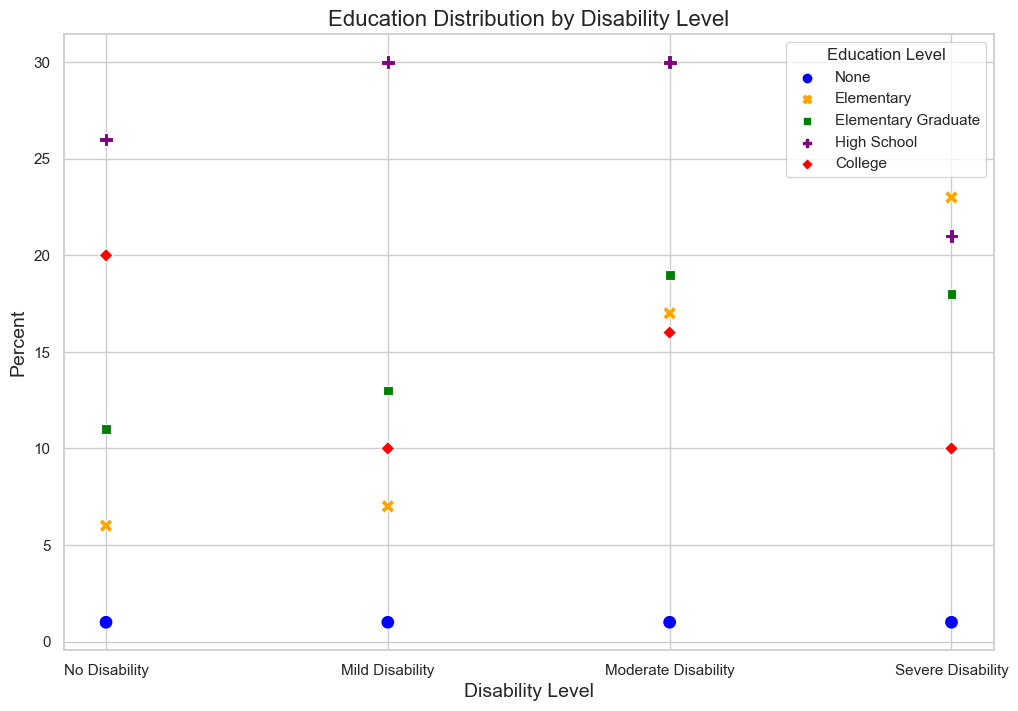

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the dataset
data = {
    'Category': ['No Disability', 'Mild Disability', 'Moderate Disability', 'Severe Disability'],
    'None': [1, 1, 1, 1],
    'Elementary': [6, 7, 17, 23],
    'Elementary Graduate': [11, 13, 19, 18],
    'High School': [26, 30, 30, 21],
    'College': [20, 10, 16, 10]
}

df_education = pd.DataFrame(data)

# Convert the dataframe to a long format
df_education_long = pd.melt(df_education, id_vars=['Category'], var_name='Education Level', value_name='Percent')

# Define custom color palette
custom_palette = {
    'None': 'blue',
    'Elementary': 'orange',
    'Elementary Graduate': 'green',
    'High School': 'purple',
    'College': 'red'
}

# Plotting the scatter plot with custom colors
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Category', y='Percent', hue='Education Level', style='Education Level', data=df_education_long, s=100, palette=custom_palette)
plt.title('Education Distribution by Disability Level', fontsize=16)
plt.xlabel('Disability Level', fontsize=14)
plt.ylabel('Percent', fontsize=14)
plt.legend(title='Education Level')
plt.show()

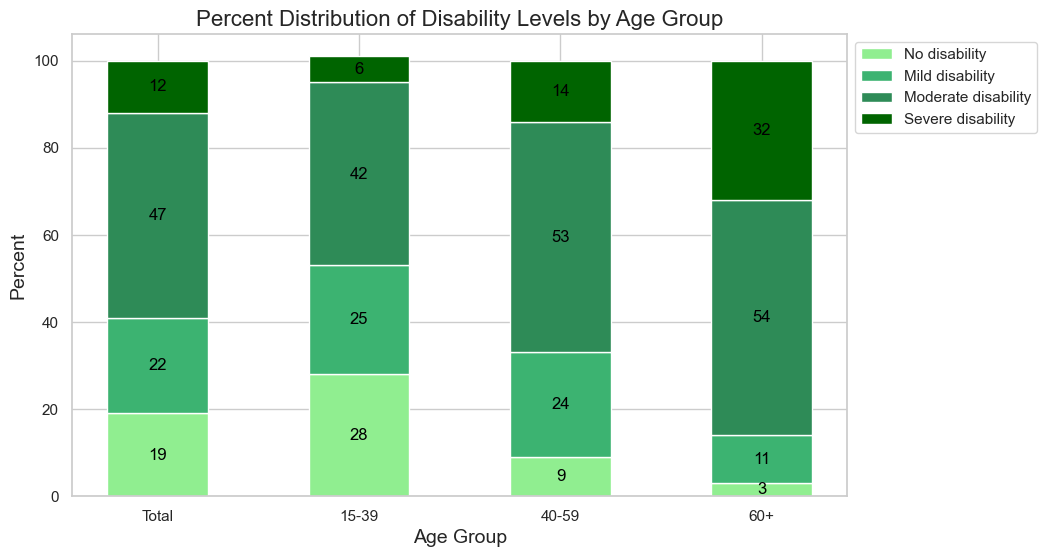

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the chart
categories = ['Total', '15-39', '40-59', '60+']
no_disability = [19, 28, 9, 3]
mild_disability = [22, 25, 24, 11]
moderate_disability = [47, 42, 53, 54]
severe_disability = [12, 6, 14, 32]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.5

# X positions for each bar
r = np.arange(len(categories))

# Plotting each bar segment
ax.bar(r, no_disability, color='lightgreen', edgecolor='white', width=bar_width, label='No disability')
ax.bar(r, mild_disability, bottom=no_disability, color='mediumseagreen', edgecolor='white', width=bar_width, label='Mild disability')
ax.bar(r, moderate_disability, bottom=np.array(no_disability)+np.array(mild_disability), color='seagreen', edgecolor='white', width=bar_width, label='Moderate disability')
ax.bar(r, severe_disability, bottom=np.array(no_disability)+np.array(mild_disability)+np.array(moderate_disability), color='darkgreen', edgecolor='white', width=bar_width, label='Severe disability')

# Adding data labels
for i in range(len(r)):
    ax.text(r[i], no_disability[i]/2, str(no_disability[i]), ha='center', va='center', color='black')
    ax.text(r[i], no_disability[i] + mild_disability[i]/2, str(mild_disability[i]), ha='center', va='center', color='black')
    ax.text(r[i], no_disability[i] + mild_disability[i] + moderate_disability[i]/2, str(moderate_disability[i]), ha='center', va='center', color='black')
    ax.text(r[i], no_disability[i] + mild_disability[i] + moderate_disability[i] + severe_disability[i]/2, str(severe_disability[i]), ha='center', va='center', color='black')

# Adding labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Percent', fontsize=14)
ax.set_title('Percent Distribution of Disability Levels by Age Group', fontsize=16)
ax.set_xticks(r)
ax.set_xticklabels(categories)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [68]:
import pandas as pd

# Data for Share of senior citizen population by usual activity or occupation
activity_data = {
    'Activity': ['Gainful workers', 'Pensioners, retired and disabled', 'Housekeepers, Own house', 'Students and dependents'],
    'Percentage': [42.1, 22.3, 20.8, 14.8]
}

occupation_data = {
    'Occupation': ['Skilled agricultural, forestry and fishery workers', 'Workers engaged in elementary occupations', 'Managers', 'Service and sales workers', 'Craft and related trades workers', 'Plants and machine operators and assemblers', 'Technicians and associate professionals', 'Professionals', 'Others'],
    'Percentage': [37.7, 15.8, 13.5, 10.5, 8.8, 5.6, 3.2, 2.8, 2.4]
}

# Data for Senior citizen population by gender
gender_data = {
    'Gender': ['Male', 'Female'],
    'Population (millions)': [3.3, 4.2],
    'Percentage': [3.3/7.5*100, 4.2/7.5*100]
}

# Data for Income and food poverty among senior citizens
poverty_data = {
    'Category': ['Income Poor', 'Food Poor'],
    'Population': [890000, 300000],
    'Percentage': [13.2, 4.3]
}

# Data for Senior citizens by income deciles
income_decile_data = {
    'Decile': ['Poorest', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Richest'],
    'Percentage': [5.5, 6.7, 8.2, 9.4, 9.7, 9.9, 11.2, 11.4, 12.5, 15.5]
}

# Creating DataFrames
df_activity = pd.DataFrame(activity_data)
df_occupation = pd.DataFrame(occupation_data)
df_gender = pd.DataFrame(gender_data)
df_poverty = pd.DataFrame(poverty_data)
df_income_decile = pd.DataFrame(income_decile_data)

# Display DataFrames
print("Activity Data:\n", df_activity)
print("\nOccupation Data:\n", df_occupation)
print("\nGender Data:\n", df_gender)
print("\nPoverty Data:\n", df_poverty)
print("\nIncome Decile Data:\n", df_income_decile)

Activity Data:
                            Activity  Percentage
0                   Gainful workers        42.1
1  Pensioners, retired and disabled        22.3
2           Housekeepers, Own house        20.8
3           Students and dependents        14.8

Occupation Data:
                                           Occupation  Percentage
0  Skilled agricultural, forestry and fishery wor...        37.7
1          Workers engaged in elementary occupations        15.8
2                                           Managers        13.5
3                          Service and sales workers        10.5
4                   Craft and related trades workers         8.8
5        Plants and machine operators and assemblers         5.6
6            Technicians and associate professionals         3.2
7                                      Professionals         2.8
8                                             Others         2.4

Gender Data:
    Gender  Population (millions)  Percentage
0    Male      

Activity Data:
                            Activity  Percentage
0                   Gainful workers        42.1
1  Pensioners, retired and disabled        22.3
2           Housekeepers, Own house        20.8
3           Students and dependents        14.8

Occupation Data:
                                           Occupation  Percentage
0  Skilled agricultural, forestry and fishery wor...        37.7
1          Workers engaged in elementary occupations        15.8
2                                           Managers        13.5
3                          Service and sales workers        10.5
4                   Craft and related trades workers         8.8
5        Plants and machine operators and assemblers         5.6
6            Technicians and associate professionals         3.2
7                                      Professionals         2.8
8                                             Others         2.4

Gender Data:
    Gender  Population (millions)  Percentage
0    Male      

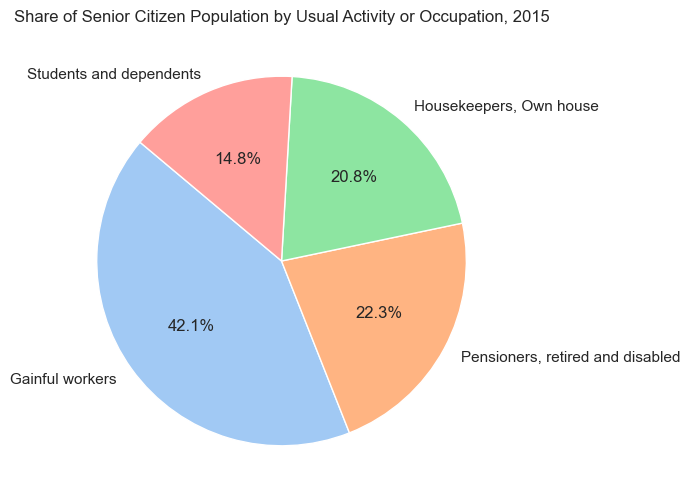

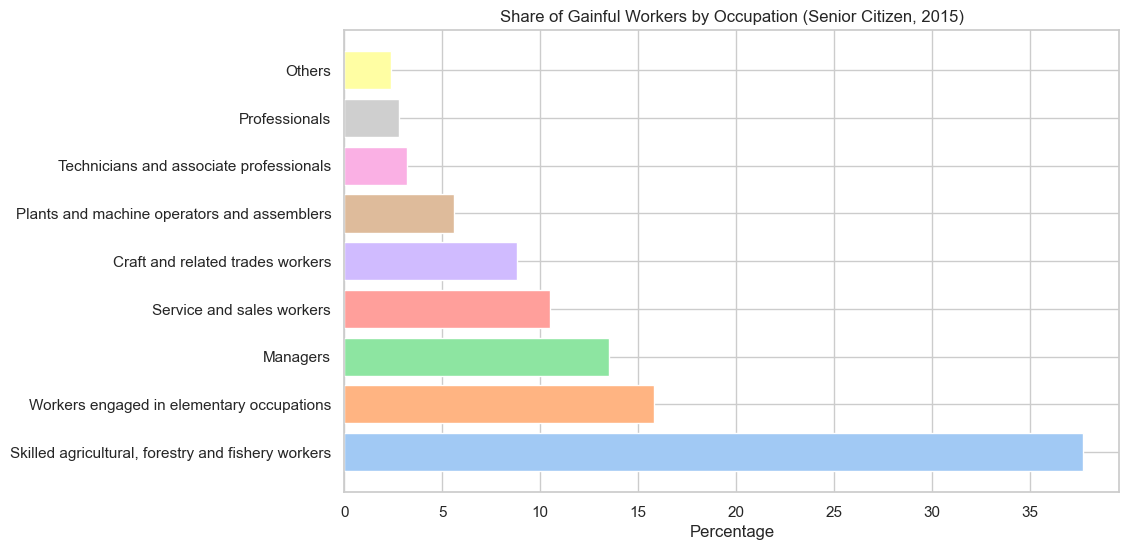

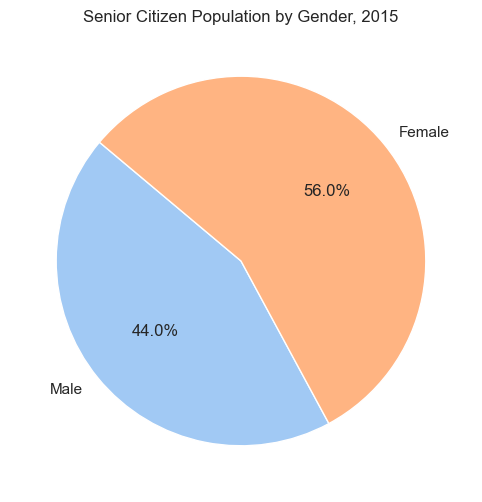

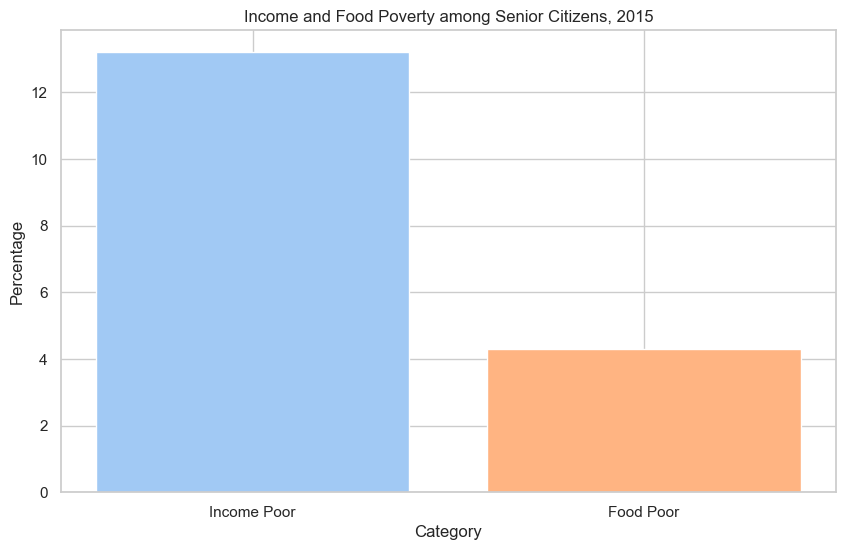

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
activity_data = {
    'Activity': ['Gainful workers', 'Pensioners, retired and disabled', 'Housekeepers, Own house', 'Students and dependents'],
    'Percentage': [42.1, 22.3, 20.8, 14.8]
}

occupation_data = {
    'Occupation': ['Skilled agricultural, forestry and fishery workers', 'Workers engaged in elementary occupations', 'Managers', 'Service and sales workers', 'Craft and related trades workers', 'Plants and machine operators and assemblers', 'Technicians and associate professionals', 'Professionals', 'Others'],
    'Percentage': [37.7, 15.8, 13.5, 10.5, 8.8, 5.6, 3.2, 2.8, 2.4]
}

gender_data = {
    'Gender': ['Male', 'Female'],
    'Population (millions)': [3.3, 4.2],
    'Percentage': [44, 56]
}

poverty_data = {
    'Category': ['Income Poor', 'Food Poor'],
    'Population': [890000, 300000],
    'Percentage': [13.2, 4.3]
}

# Creating DataFrames
df_activity = pd.DataFrame(activity_data)
df_occupation = pd.DataFrame(occupation_data)
df_gender = pd.DataFrame(gender_data)
df_poverty = pd.DataFrame(poverty_data)

# Print the values
print("Activity Data:\n", df_activity)
print("\nOccupation Data:\n", df_occupation)
print("\nGender Data:\n", df_gender)
print("\nPoverty Data:\n", df_poverty)

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting Activity Data
plt.figure(figsize=(10, 6))
plt.pie(df_activity['Percentage'], labels=df_activity['Activity'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Share of Senior Citizen Population by Usual Activity or Occupation, 2015')
plt.show()

# Plotting Occupation Data
plt.figure(figsize=(10, 6))
plt.barh(df_occupation['Occupation'], df_occupation['Percentage'], color=sns.color_palette("pastel"))
plt.xlabel('Percentage')
plt.title('Share of Gainful Workers by Occupation (Senior Citizen, 2015)')
plt.show()

# Plotting Gender Data
plt.figure(figsize=(10, 6))
plt.pie(df_gender['Percentage'], labels=df_gender['Gender'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Senior Citizen Population by Gender, 2015')
plt.show()

# Plotting Poverty Data
plt.figure(figsize=(10, 6))
plt.bar(df_poverty['Category'], df_poverty['Percentage'], color=sns.color_palette("pastel"))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Income and Food Poverty among Senior Citizens, 2015')
plt.show()


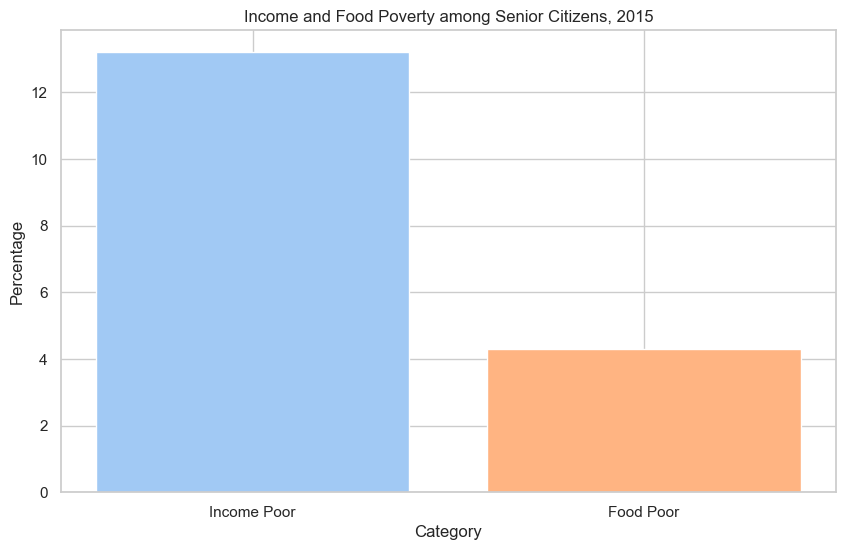

In [70]:
# Plotting Poverty Data
plt.figure(figsize=(10, 6))
plt.bar(df_poverty['Category'], df_poverty['Percentage'], color=sns.color_palette("pastel"))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Income and Food Poverty among Senior Citizens, 2015')
plt.show()

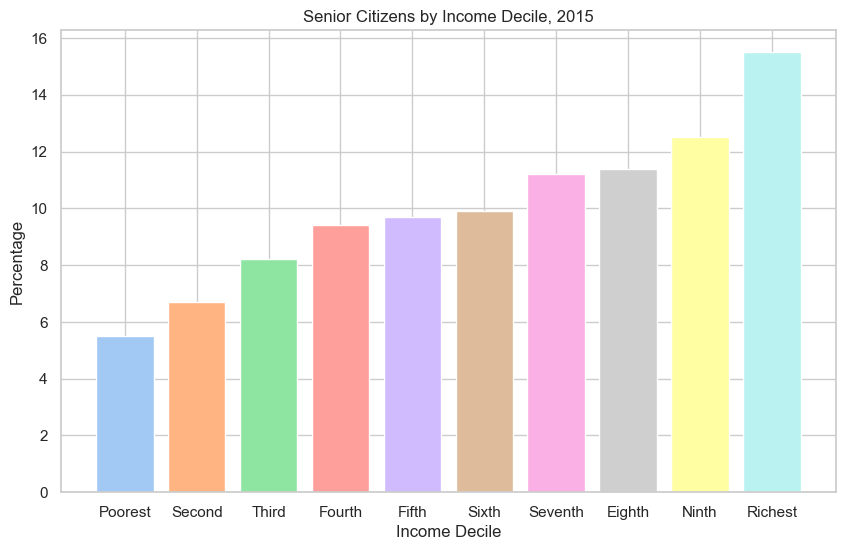

In [71]:
# Plotting Income Decile Data
plt.figure(figsize=(10, 6))
plt.bar(df_income_decile['Decile'], df_income_decile['Percentage'], color=sns.color_palette("pastel"))
plt.xlabel('Income Decile')
plt.ylabel('Percentage')
plt.title('Senior Citizens by Income Decile, 2015')
plt.show()

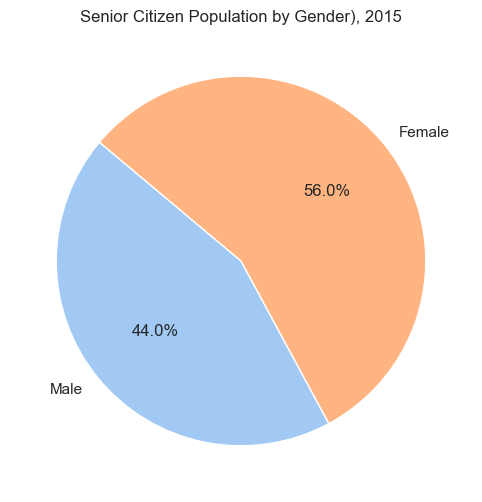

In [75]:
# Plotting Gender Data
plt.figure(figsize=(10, 6))
plt.pie(df_gender['Percentage'], labels=df_gender['Gender'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Senior Citizen Population by Gender), 2015')
plt.show()

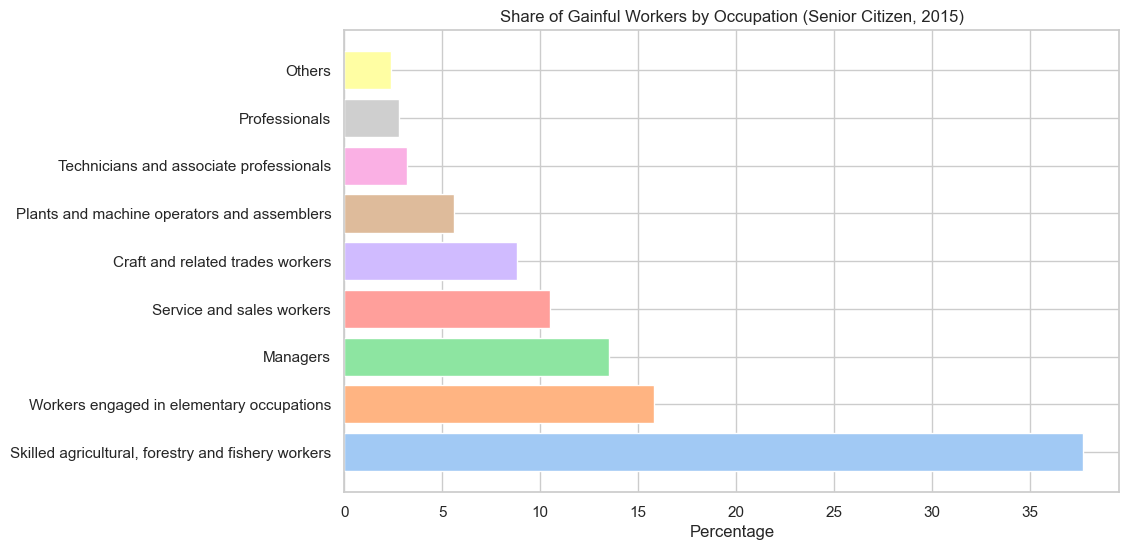

In [76]:
# Plotting Occupation Data
plt.figure(figsize=(10, 6))
plt.barh(df_occupation['Occupation'], df_occupation['Percentage'], color=sns.color_palette("pastel"))
plt.xlabel('Percentage')
plt.title('Share of Gainful Workers by Occupation (Senior Citizen, 2015)')
plt.show()

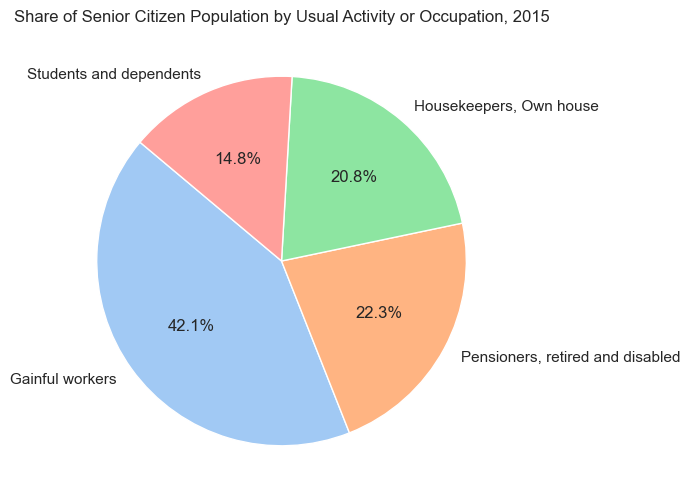

In [78]:
# Plotting Activity Data
plt.figure(figsize=(10, 6))
plt.pie(df_activity['Percentage'], labels=df_activity['Activity'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Share of Senior Citizen Population by Usual Activity or Occupation, 2015')
plt.show()

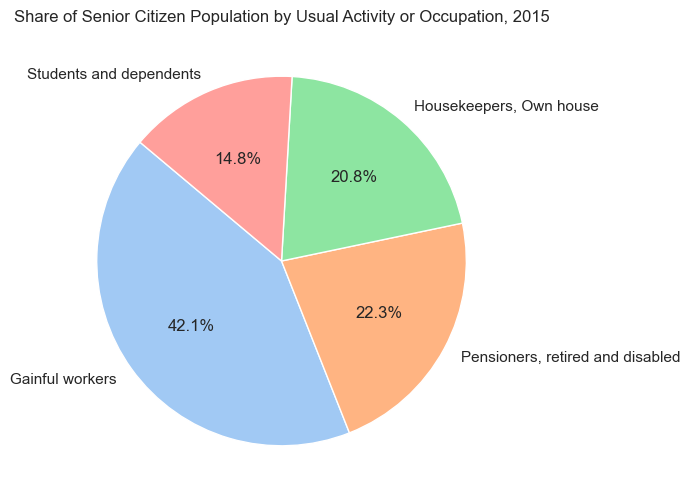

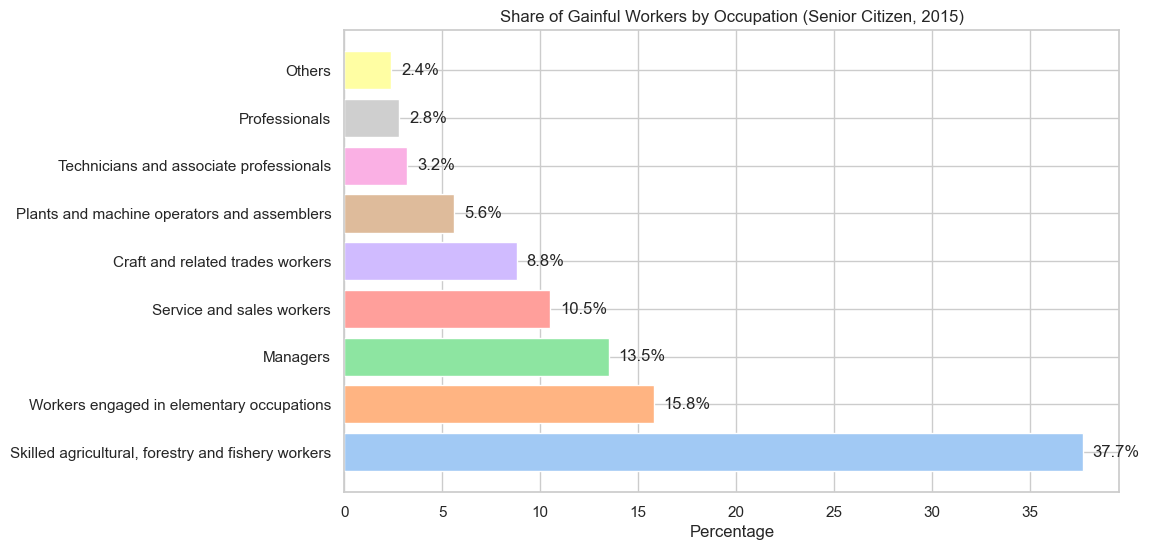

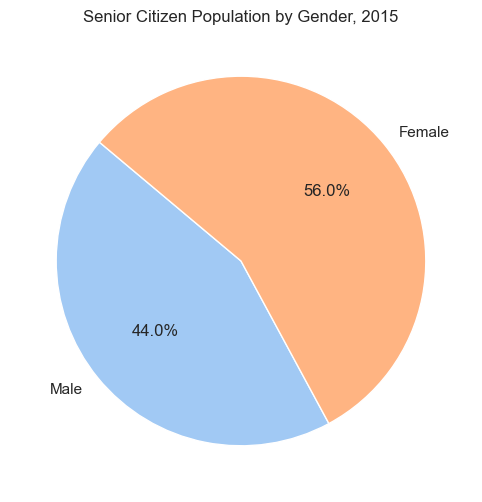

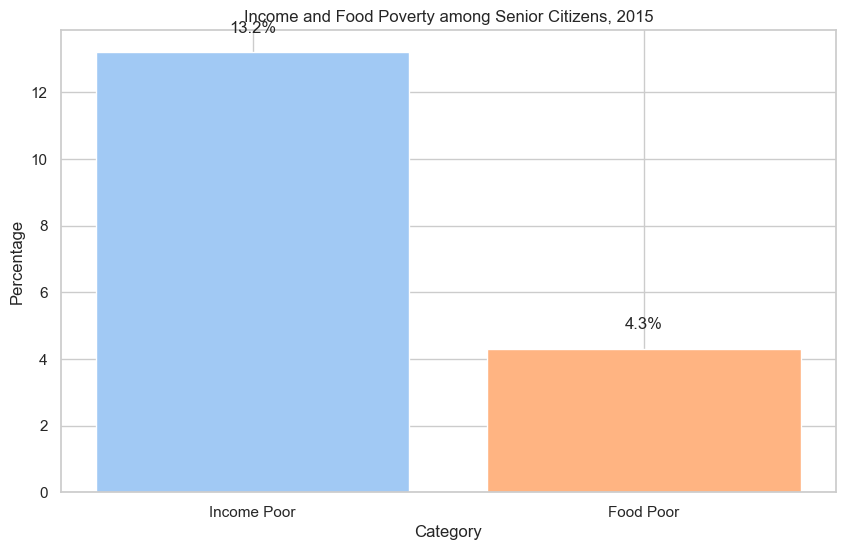

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
activity_data = {
    'Activity': ['Gainful workers', 'Pensioners, retired and disabled', 'Housekeepers, Own house', 'Students and dependents'],
    'Percentage': [42.1, 22.3, 20.8, 14.8]
}

occupation_data = {
    'Occupation': ['Skilled agricultural, forestry and fishery workers', 'Workers engaged in elementary occupations', 'Managers', 'Service and sales workers', 'Craft and related trades workers', 'Plants and machine operators and assemblers', 'Technicians and associate professionals', 'Professionals', 'Others'],
    'Percentage': [37.7, 15.8, 13.5, 10.5, 8.8, 5.6, 3.2, 2.8, 2.4]
}

gender_data = {
    'Gender': ['Male', 'Female'],
    'Population (millions)': [3.3, 4.2],
    'Percentage': [44, 56]
}

poverty_data = {
    'Category': ['Income Poor', 'Food Poor'],
    'Population': [890000, 300000],
    'Percentage': [13.2, 4.3]
}

# Creating DataFrames
df_activity = pd.DataFrame(activity_data)
df_occupation = pd.DataFrame(occupation_data)
df_gender = pd.DataFrame(gender_data)
df_poverty = pd.DataFrame(poverty_data)

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting Activity Data
plt.figure(figsize=(10, 6))
plt.pie(df_activity['Percentage'], labels=df_activity['Activity'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Share of Senior Citizen Population by Usual Activity or Occupation, 2015')
plt.show()

# Plotting Occupation Data
plt.figure(figsize=(10, 6))
bars = plt.barh(df_occupation['Occupation'], df_occupation['Percentage'], color=sns.color_palette("pastel"))
plt.xlabel('Percentage')
plt.title('Share of Gainful Workers by Occupation (Senior Citizen, 2015)')
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center')
plt.show()

# Plotting Gender Data
plt.figure(figsize=(10, 6))
plt.pie(df_gender['Percentage'], labels=df_gender['Gender'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Senior Citizen Population by Gender, 2015')
plt.show()

# Plotting Poverty Data
plt.figure(figsize=(10, 6))
bars = plt.bar(df_poverty['Category'], df_poverty['Percentage'], color=sns.color_palette("pastel"))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Income and Food Poverty among Senior Citizens, 2015')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height()}%', ha='center', va='bottom')
plt.show()

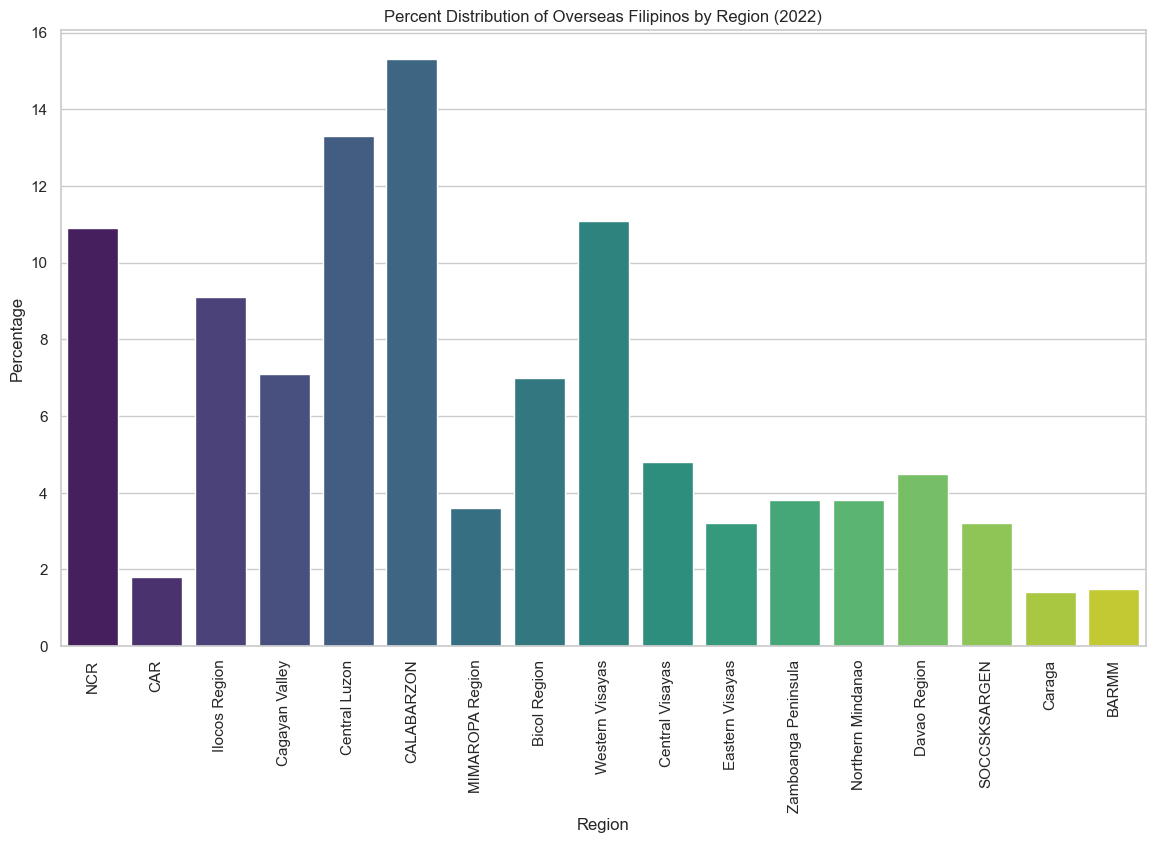

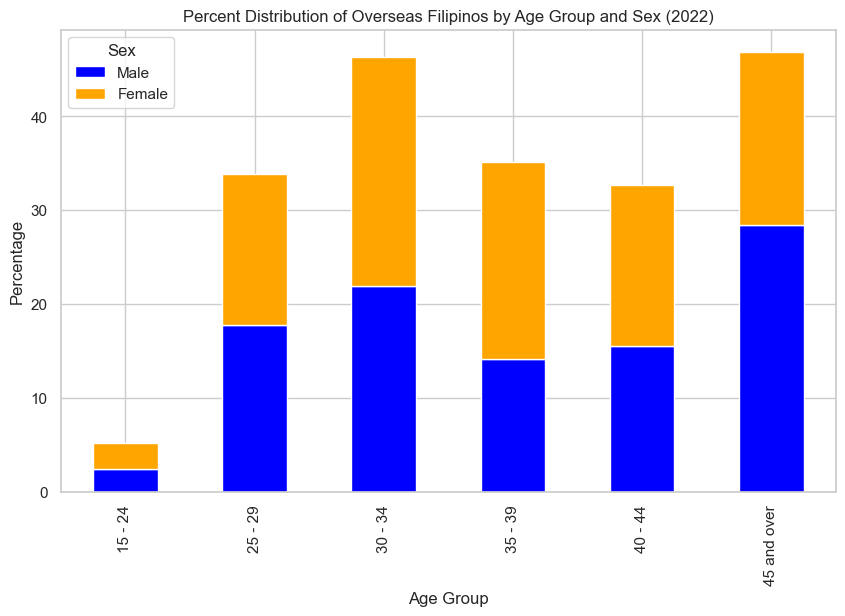

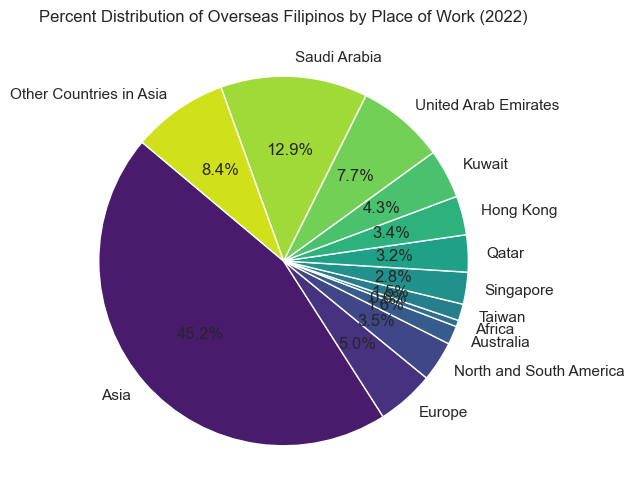

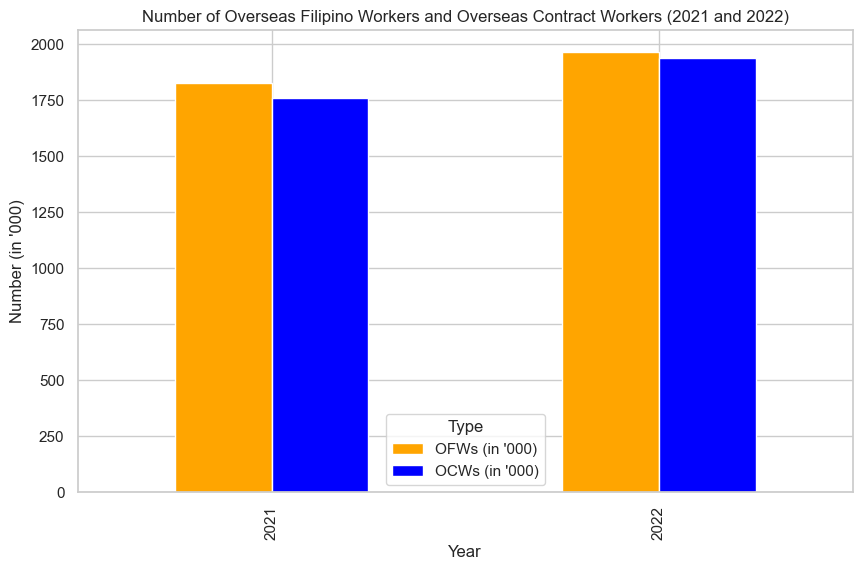

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrames from the provided data
df_region = pd.DataFrame({
    'Region': ['NCR', 'CAR', 'Ilocos Region', 'Cagayan Valley', 'Central Luzon', 'CALABARZON', 'MIMAROPA Region', 'Bicol Region', 'Western Visayas', 'Central Visayas', 'Eastern Visayas', 'Zamboanga Peninsula', 'Northern Mindanao', 'Davao Region', 'SOCCSKSARGEN', 'Caraga', 'BARMM'],
    'Percentage': [10.9, 1.8, 9.1, 7.1, 13.3, 15.3, 3.6, 7.0, 11.1, 4.8, 3.2, 3.8, 3.8, 4.5, 3.2, 1.4, 1.5]
})

df_age_sex = pd.DataFrame({
    'Age Group': ['15 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 and over'],
    'Male': [2.4, 17.7, 21.9, 14.1, 15.5, 28.4],
    'Female': [2.8, 16.1, 24.4, 21.0, 17.2, 18.5]
})

df_place_work = pd.DataFrame({
    'Place': ['Asia', 'Europe', 'North and South America', 'Australia', 'Africa', 'Taiwan', 'Singapore', 'Qatar', 'Hong Kong', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Other Countries in Asia'],
    'Percentage': [80.8, 9.0, 6.3, 2.9, 1.0, 2.6, 5.0, 5.8, 6.1, 7.7, 13.7, 23.0, 15.0]
})

df_workers = pd.DataFrame({
    'Year': [2021, 2022],
    'OFWs (in \'000)': [1825, 1963],
    'OCWs (in \'000)': [1760, 1937]
})

# Visualization examples
# Region Distribution Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Percentage', data=df_region, palette='viridis')
plt.xticks(rotation=90)
plt.title('Percent Distribution of Overseas Filipinos by Region (2022)')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

# Age and Sex Distribution Stacked Bar Plot
df_age_sex.set_index('Age Group').plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))
plt.title('Percent Distribution of Overseas Filipinos by Age Group and Sex (2022)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Sex')
plt.show()

# Place of Work Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(df_place_work['Percentage'], labels=df_place_work['Place'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(df_place_work)))
plt.title('Percent Distribution of Overseas Filipinos by Place of Work (2022)')
plt.show()

# Number of Workers Bar Plot
df_workers.set_index('Year').plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Number of Overseas Filipino Workers and Overseas Contract Workers (2021 and 2022)')
plt.xlabel('Year')
plt.ylabel('Number (in \'000)')
plt.legend(title='Type')
plt.show()

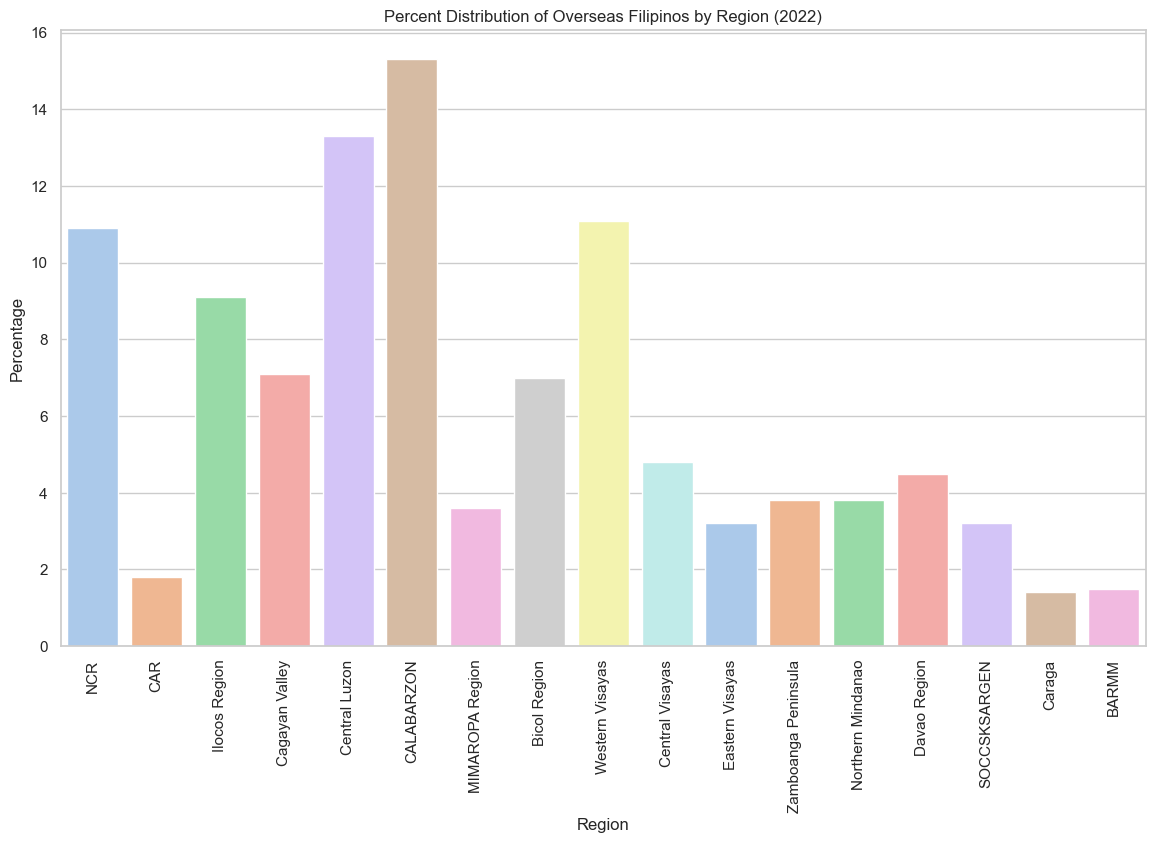

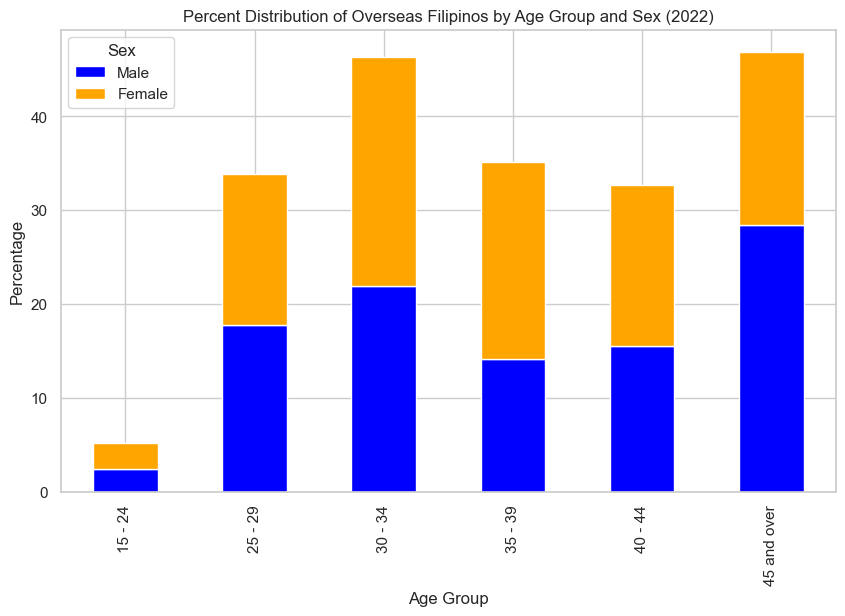

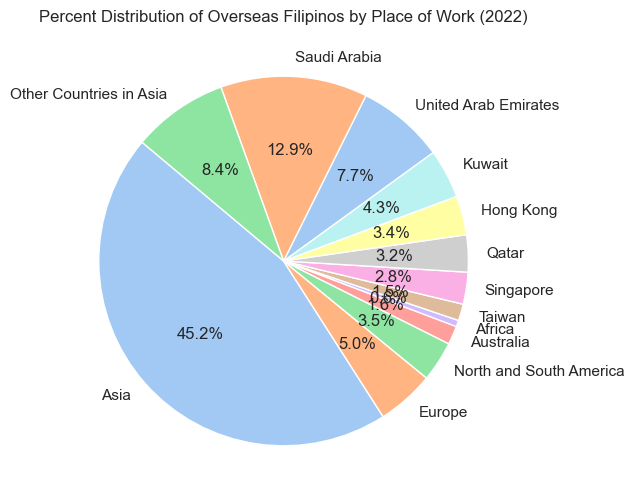

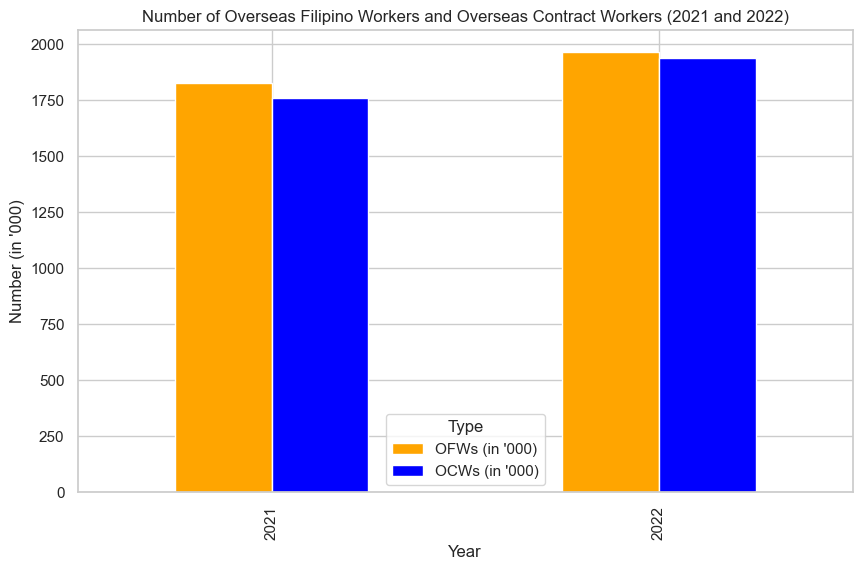

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrames from the provided data
df_region = pd.DataFrame({
    'Region': ['NCR', 'CAR', 'Ilocos Region', 'Cagayan Valley', 'Central Luzon', 'CALABARZON', 'MIMAROPA Region', 'Bicol Region', 'Western Visayas', 'Central Visayas', 'Eastern Visayas', 'Zamboanga Peninsula', 'Northern Mindanao', 'Davao Region', 'SOCCSKSARGEN', 'Caraga', 'BARMM'],
    'Percentage': [10.9, 1.8, 9.1, 7.1, 13.3, 15.3, 3.6, 7.0, 11.1, 4.8, 3.2, 3.8, 3.8, 4.5, 3.2, 1.4, 1.5]
})

df_age_sex = pd.DataFrame({
    'Age Group': ['15 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 and over'],
    'Male': [2.4, 17.7, 21.9, 14.1, 15.5, 28.4],
    'Female': [2.8, 16.1, 24.4, 21.0, 17.2, 18.5]
})

df_place_work = pd.DataFrame({
    'Place': ['Asia', 'Europe', 'North and South America', 'Australia', 'Africa', 'Taiwan', 'Singapore', 'Qatar', 'Hong Kong', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Other Countries in Asia'],
    'Percentage': [80.8, 9.0, 6.3, 2.9, 1.0, 2.6, 5.0, 5.8, 6.1, 7.7, 13.7, 23.0, 15.0]
})

df_workers = pd.DataFrame({
    'Year': [2021, 2022],
    'OFWs (in \'000)': [1825, 1963],
    'OCWs (in \'000)': [1760, 1937]
})

# Visualization examples
# Region Distribution Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Percentage', data=df_region, palette='pastel')
plt.xticks(rotation=90)
plt.title('Percent Distribution of Overseas Filipinos by Region (2022)')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

# Place of Work Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(df_place_work['Percentage'], labels=df_place_work['Place'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(df_place_work)))
plt.title('Percent Distribution of Overseas Filipinos by Place of Work (2022)')
plt.show()

# Number of Workers Bar Plot
df_workers.set_index('Year').plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Number of Overseas Filipino Workers and Overseas Contract Workers (2021 and 2022)')
plt.xlabel('Year')
plt.ylabel('Number (in \'000)')
plt.legend(title='Type')
plt.show()


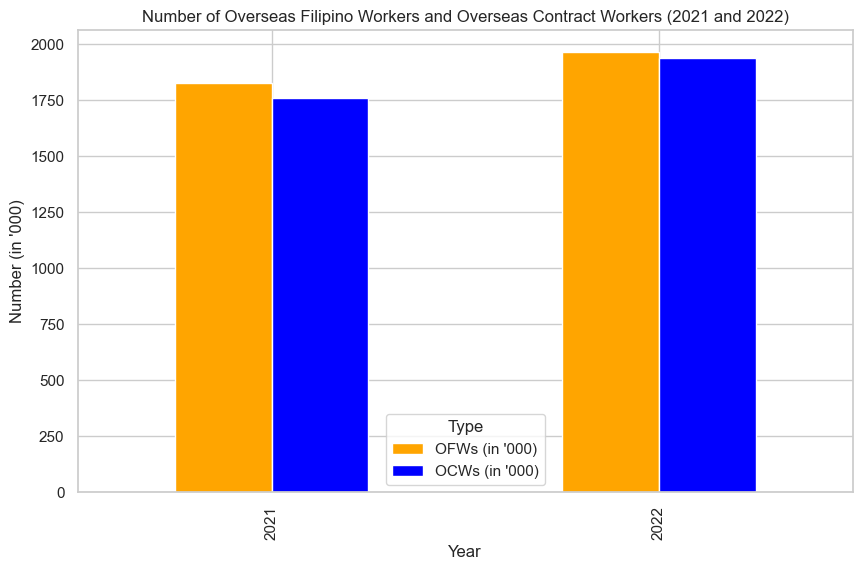

In [85]:
# Number of Workers Bar Plot
df_workers.set_index('Year').plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Number of Overseas Filipino Workers and Overseas Contract Workers (2021 and 2022)')
plt.xlabel('Year')
plt.ylabel('Number (in \'000)')
plt.legend(title='Type')
plt.show()


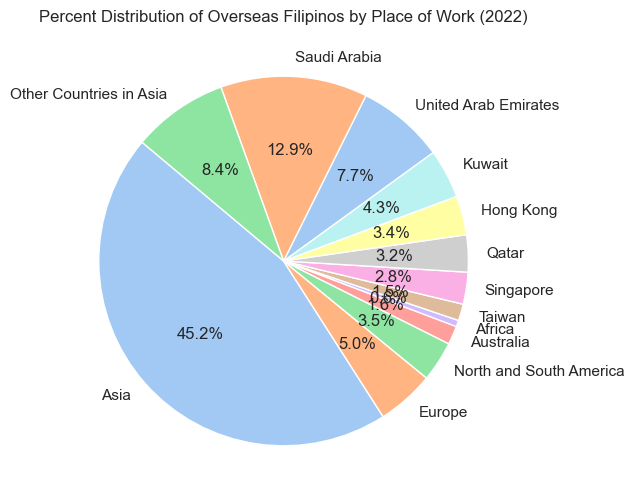

In [86]:
# Place of Work Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(df_place_work['Percentage'], labels=df_place_work['Place'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(df_place_work)))
plt.title('Percent Distribution of Overseas Filipinos by Place of Work (2022)')
plt.show()

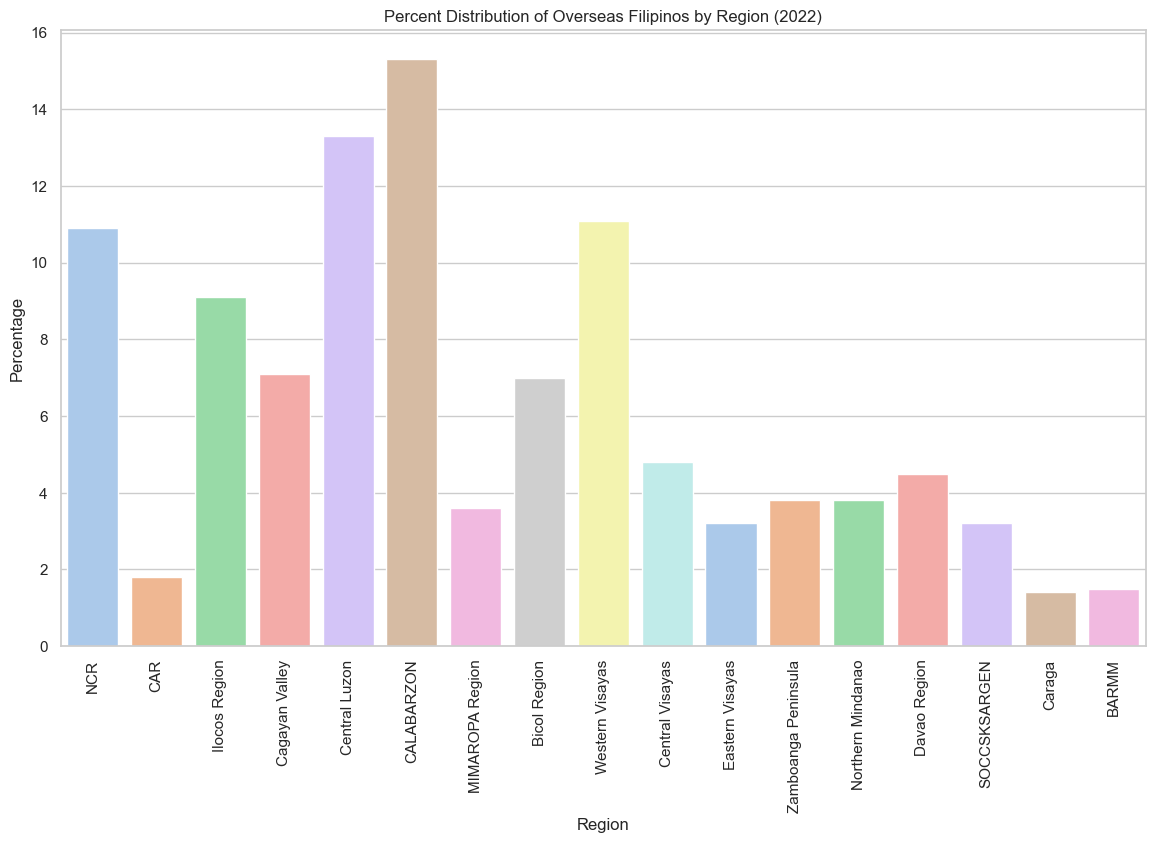

In [87]:
# Region Distribution Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Percentage', data=df_region, palette='pastel')
plt.xticks(rotation=90)
plt.title('Percent Distribution of Overseas Filipinos by Region (2022)')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

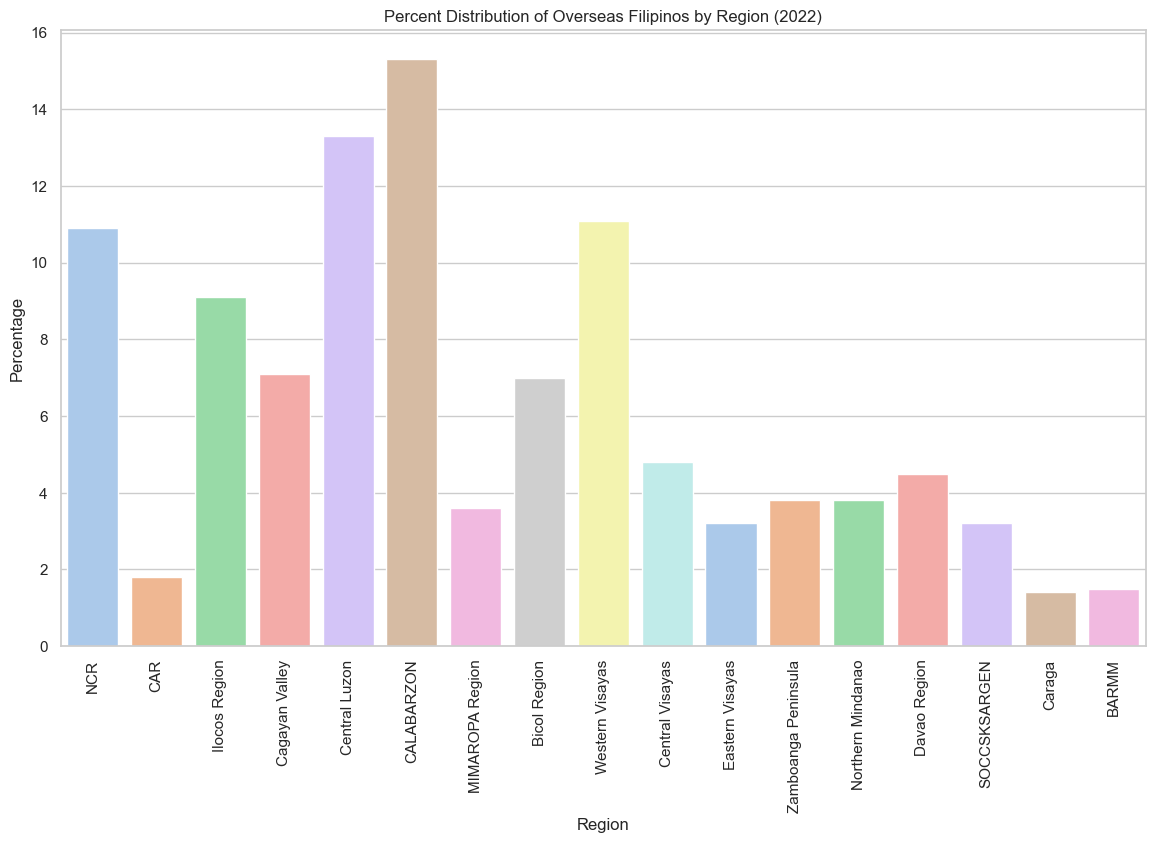

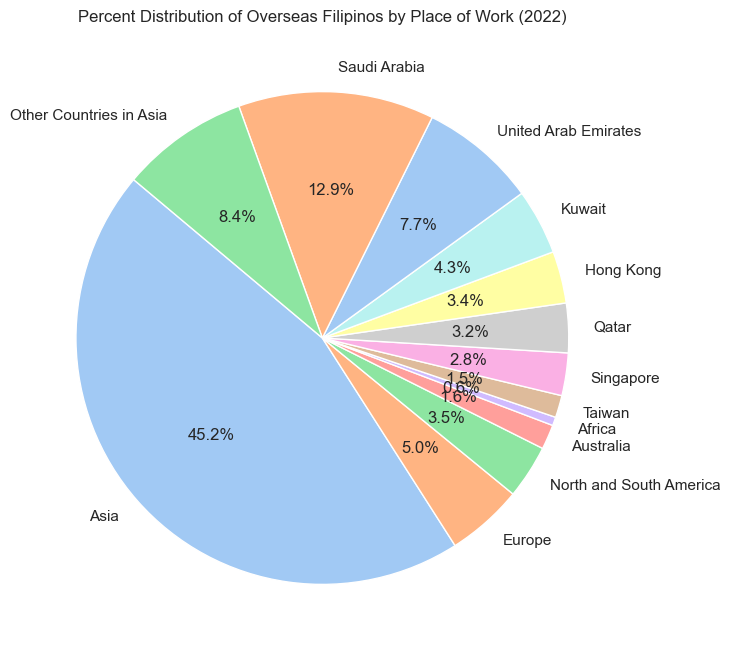

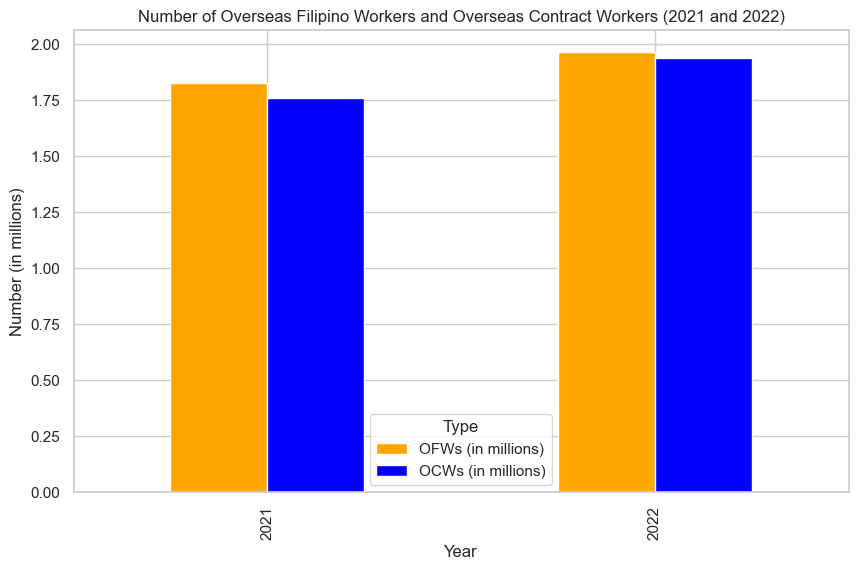

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrames from the provided data
df_region = pd.DataFrame({
    'Region': ['NCR', 'CAR', 'Ilocos Region', 'Cagayan Valley', 'Central Luzon', 'CALABARZON', 'MIMAROPA Region', 'Bicol Region', 'Western Visayas', 'Central Visayas', 'Eastern Visayas', 'Zamboanga Peninsula', 'Northern Mindanao', 'Davao Region', 'SOCCSKSARGEN', 'Caraga', 'BARMM'],
    'Percentage': [10.9, 1.8, 9.1, 7.1, 13.3, 15.3, 3.6, 7.0, 11.1, 4.8, 3.2, 3.8, 3.8, 4.5, 3.2, 1.4, 1.5]
})

df_age_sex = pd.DataFrame({
    'Age Group': ['15 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 and over'],
    'Male': [2.4, 17.7, 21.9, 14.1, 15.5, 28.4],
    'Female': [2.8, 16.1, 24.4, 21.0, 17.2, 18.5]
})

df_place_work = pd.DataFrame({
    'Place': ['Asia', 'Europe', 'North and South America', 'Australia', 'Africa', 'Taiwan', 'Singapore', 'Qatar', 'Hong Kong', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Other Countries in Asia'],
    'Percentage': [80.8, 9.0, 6.3, 2.9, 1.0, 2.6, 5.0, 5.8, 6.1, 7.7, 13.7, 23.0, 15.0]
})

df_workers = pd.DataFrame({
    'Year': [2021, 2022],
    'OFWs (in millions)': [1.825, 1.963],
    'OCWs (in millions)': [1.760, 1.937]
})

# Visualization examples
# Region Distribution Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Percentage', data=df_region, palette='pastel')
plt.xticks(rotation=90)
plt.title('Percent Distribution of Overseas Filipinos by Region (2022)')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

# Place of Work Pie Chart
plt.figure(figsize=(12, 8))
plt.pie(df_place_work['Percentage'], labels=df_place_work['Place'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(df_place_work)))
plt.title('Percent Distribution of Overseas Filipinos by Place of Work (2022)')
plt.show()

# Number of Workers Bar Plot
df_workers.set_index('Year').plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Number of Overseas Filipino Workers and Overseas Contract Workers (2021 and 2022)')
plt.xlabel('Year')
plt.ylabel('Number (in millions)')
plt.legend(title='Type')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression




# Load the data from the CSV files
city_temperature = pd.read_csv('city_temperature2.csv')
historical_emissions = pd.read_csv('historical_emissions.csv')
average_temp = pd.read_csv('Average Temperature 1900-2023.csv')
philippines_temp = city_temperature[(city_temperature['Country'] == 'Philippines') & (city_temperature['Year'] >= 2000)]






# Reshape historical_emissions to have a "Year" column
philippines_emissions = historical_emissions[historical_emissions['Country'] == 'Philippines']
philippines_emissions = philippines_emissions.melt(id_vars=['ISO', 'Country', 'Data source', 'Sector', 'Gas', 'Unit'],
                                                   var_name='Year', value_name='Emissions')


# Convert the 'Year' column to numeric
philippines_emissions['Year'] = pd.to_numeric(philippines_emissions['Year'])


# Calculate the average temperature per year
philippines_temp_avg = philippines_temp.groupby('Year')['AvgTemperature'].mean().reset_index()
philippines_emissions_avg = philippines_emissions.groupby('Year')['Emissions'].mean().reset_index()


# Merge dataframes on Year
merged_data = pd.merge(philippines_temp_avg, philippines_emissions_avg, on='Year')


# Plotting
fig, ax1 = plt.subplots(figsize=(14,8))


bar_width = 0.4
years = merged_data['Year']
bar1 = ax1.bar(years - bar_width/2, merged_data['Emissions'], bar_width, label='Emissions (MtCO₂e)', color='yellow')
bar2 = ax1.bar(years + bar_width/2, merged_data['AvgTemperature'], bar_width, label='AvgTemperature (Fahrenheit)', color='black')


# Add annotations for each bar
for i, v in enumerate(merged_data['Emissions']):
    ax1.text(years[i] - bar_width/2, v + 0.1, f'{v:.2f}', ha='center', va='bottom', color='blue')


for i, v in enumerate(merged_data['AvgTemperature']):
    ax1.text(years[i] + bar_width/2, v + 0.1, f'{v:.2f}', ha='center', va='bottom', color='black')


# Add plot details
ax1.set_xlabel('Year')
ax1.set_ylabel('Value')
ax1.set_title('Emissions and Average Temperature (Philippines)')
ax1.legend()


# Increase the number of y-axis ticks and set gridlines to show details
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))  


plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


# 2. Progression of temperature from 2000 - 2023 (Philippines)
# Plotting original data
plt.figure(figsize=(12, 8))
sns.lineplot(data=philippines_temp, x='Year', y='AvgTemperature', marker='o', label='Original Data')


# Linear regression model
X = philippines_temp[['Year']]
y = philippines_temp['AvgTemperature']


model = LinearRegression()
model.fit(X, y)


# Predict temperatures for years 2021 to 2024
future_years = np.arange(2025, 2030).reshape(-1, 1)
predicted_temps = model.predict(future_years)


# Plotting predicted values
plt.plot(future_years, predicted_temps, marker='o', linestyle='dashed', color='red', label='Predicted (Linear Regression)')


# Customize the x-axis ticks to show every year
years = range(2000, 2030)
plt.xticks(years, rotation=45)


plt.xticks(years, rotation=45)


plt.title('Progression of Temperature with Linear Regression Prediction (Philippines)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.legend(fontsize='small')  # Adjusting legend size to 'small'
plt.grid(True)
plt.show()


# Read the CSV file
df = pd.read_csv('historical_emissions_SEA.csv')


# Aggregate emissions for each country
df['Total_Emissions'] = df.iloc[:, 6:].sum(axis=1)


# Extract relevant data for plotting
countries = df['Country']
total_emissions = df['Total_Emissions']


# Calculate percentage for each country's emissions
total_sum = total_emissions.sum()
percentages = (total_emissions / total_sum) * 100


# Categorize countries into 'Others' if their emissions are below 2%
mask = percentages >= 2
main_countries = countries[mask]
main_emissions = total_emissions[mask]


others_emissions = total_emissions[~mask].sum()
main_countries = pd.concat([main_countries, pd.Series(['Others (Singapore, Laos, Brunei)'])], ignore_index=True)
main_emissions = pd.concat([main_emissions, pd.Series([others_emissions])], ignore_index=True)


# Create explode array to offset only Indonesia
explode = [0.07 if country == 'Indonesia' else 0 for country in main_countries]


# Plotting the pie chart
plt.figure(figsize=(10,10))
wedges, texts, autotexts = plt.pie(main_emissions, labels=main_countries, autopct='%1.1f%%', startangle=140, explode=explode)


# Add legend on the side
plt.legend(wedges, main_countries, title="Countries", loc="lower left", bbox_to_anchor=(0.8, 0, 0.5, 1))

# Title and formatting
plt.title('Total Greenhouse Gas Emissions by Country (2000-2021)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'city_temperature2.csv'